In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [ ]:
file_path = "dengue.csv"
df = pd.read_csv(file_path)

Selecting relevant columns

In [ ]:
df = df[['Year', 'dengue_total']]

Simulating weather data

In [ ]:
np.random.seed(42)
df['temperature'] = np.random.randint(20, 40, size=len(df))  # Random temps between 20-40°C
df['humidity'] = np.random.randint(50, 90, size=len(df))  # Random humidity 50-90%
df['rainfall'] = np.random.randint(50, 300, size=len(df))  # Random rainfall 50-300mm

Define outbreak risk (High if cases > 5000, else Low)

In [ ]:
df['outbreak_risk'] = df['dengue_total'].apply(lambda x: 1 if x > 5000 else 0)

Drop original case count after classification

In [ ]:
df.drop(columns=['dengue_total'], inplace=True)

Splitting Data

In [ ]:
X = df[['Year', 'temperature', 'humidity', 'rainfall']]
y = df['outbreak_risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate Model

In [ ]:
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.8333333333333334


Save Model

In [ ]:
import joblib
joblib.dump(model, "dengue_rf_model.pkl")

['dengue_rf_model.pkl']

In [ ]:
# Load Model
loaded_model = joblib.load('outbreak_predictor.pkl')

# Sample prediction (modify values)
sample_input = [[2025, 32, 75, 200]]  # Year=2025, Temp=32°C, Humidity=75%, Rainfall=200mm
prediction = loaded_model.predict(sample_input)

print("Predicted Outbreak Risk:", "High" if prediction[0] == 1 else "Low")


Predicted Outbreak Risk: High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files

# Replace 'outbreak_predictor.pkl' with your actual file name
files.download('outbreak_predictor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Performance Visualization

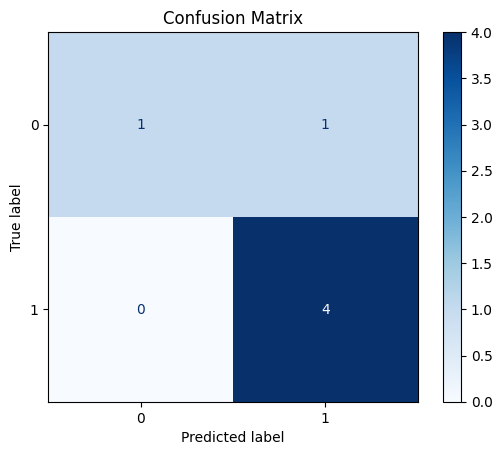

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

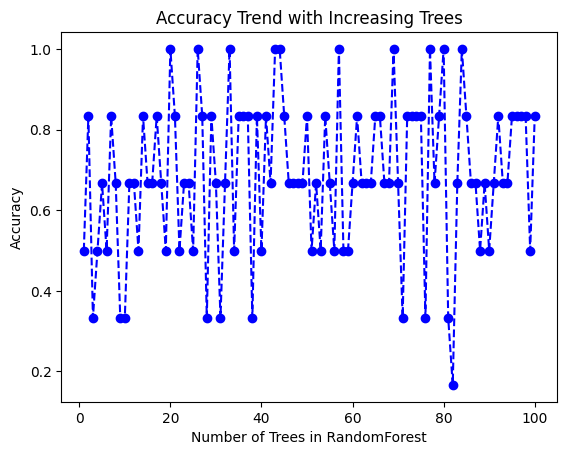

In [ ]:

import numpy as np

epochs = range(1, len(model.estimators_) + 1)
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in model.estimators_]

plt.plot(epochs, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Trees in RandomForest')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend with Increasing Trees')
plt.show()


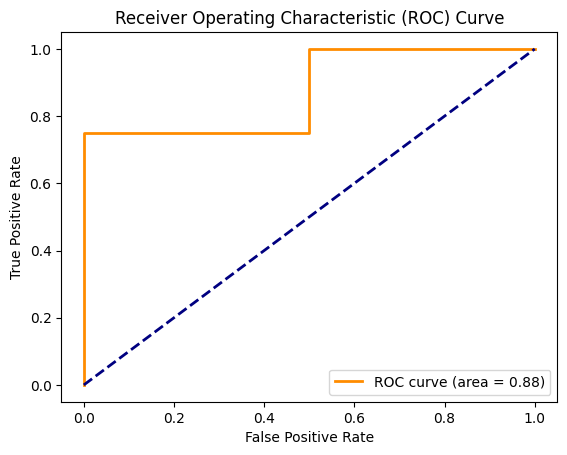

In [ ]:

from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
